In [1]:
print("Merhaba IGU MYO YZ Dersim 5.Hafta") #YAPAY ZEKA DERSI

Merhaba IGU MYO YZ Dersim 5.Hafta


In [2]:
import sys #import pyhton programlama dilinde yazılıma kütüphane eklemeye yarar kod
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [3]:
from google.colab import drive #google colab - drive baglantısı
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/Yapay_Zeka_Dersim')
#!pwd #bize kodun çıktısını dosya yolu olarak veren kod bloğudur.

In [5]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split#ayırma işlemi
from sklearn.linear_model import LinearRegression#en basit mak ögrenme algoritması
from sklearn.metrics import mean_squared_error, r2_score #eror hata alır
import pandas as pd#pandası dahile etmiş

# California Housing veri setini yükleme
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names) #sanıyede ıuslenen verı dataframe ,feature  tabloolardakı degiskenlerin ismi
df['PRICE'] = housing.target #fiyat tahmini

# Özellikler ve hedef değişkeni ayırma
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)##%20 test random state karısık seciyor 42 42 olarak  #train eğitim

# Model oluşturma
model = LinearRegression()#algoritma adı
model.fit(X_train, y_train)#modeli olusturan .fit olarak

# Tahmin yapma
predictions = model.predict(X_test)#modeli tahmin yapar
print("Tahmin Sonucları: ", predictions[:5])
print("Gerçek Değerler: ", y_test[:5].values)

# Sistemin Ortalama Hatası (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) Sonucu:", mse)

# Sistemin R-kare Hatası (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²) Sonucu:", r2)

Tahmin Sonucları:  [0.72604907 1.76743383 2.71092161 2.83514727 2.60695807]
Gerçek Değerler:  [0.477   0.458   5.00001 2.186   2.78   ]
Mean Squared Error (MSE) Sonucu: 0.5305677824766758
R-squared (R²) Sonucu: 0.595770232606166


In [6]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme
x_train, x_test = x_train / 255.0, x_test / 255.0
!pwd


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
/content/drive/MyDrive/Yapay_Zeka_Dersim


In [10]:

#TensorFlow  kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması
!pip install tensorflow
!pip install pydot
!apt-get install graphviz

#Bu iki kütüphane ile oluşturulan yapay zeka modelinin yapısını çıktı alabileceğiz.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [11]:
!pip install tensorflow

!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


mnıst rakam veriseti tahmin eder 0-9

In [13]:
import tensorflow as tf #
from tensorflow.keras import layers, models#GİRİŞ DEĞERLKERİ TÜM ARA KATMANLARA GIDER 3 GİRİŞ 5 KATMAN
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = mnist.load_data() # MNIST veri setini yükleme
x_train, x_test = x_train / 255.0, x_test / 255.0
!pwd

/content/drive/MyDrive/Yapay_Zeka_Dersim


In [14]:

model = models.Sequential([ # Modeli oluşturmUR
    layers.Flatten(input_shape=(28, 28)),#28 e 28  bilgi
    layers.Dense(128, activation='relu'),#bilgisayarın anlamasını kolaylasttırır
    layers.Dropout(0.2),#0,2test  0,8train için ayıur demek
    layers.Dense(10, activation='softmax')# 10 giriş bilgisi dense katmanında olasılıklı 0,1 li sonucu softmax ile anlarız
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam', # Modeli derleme
              loss='sparse_categorical_crossentropy',#kaybına bunu atmışız
              metrics=['accuracy'])#doğruluk olmalı her zaman metrics

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0611
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9822 - loss: 0.0550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9843 - loss: 0.0505
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9843 - loss: 0.0455
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9868 - loss: 0.0413


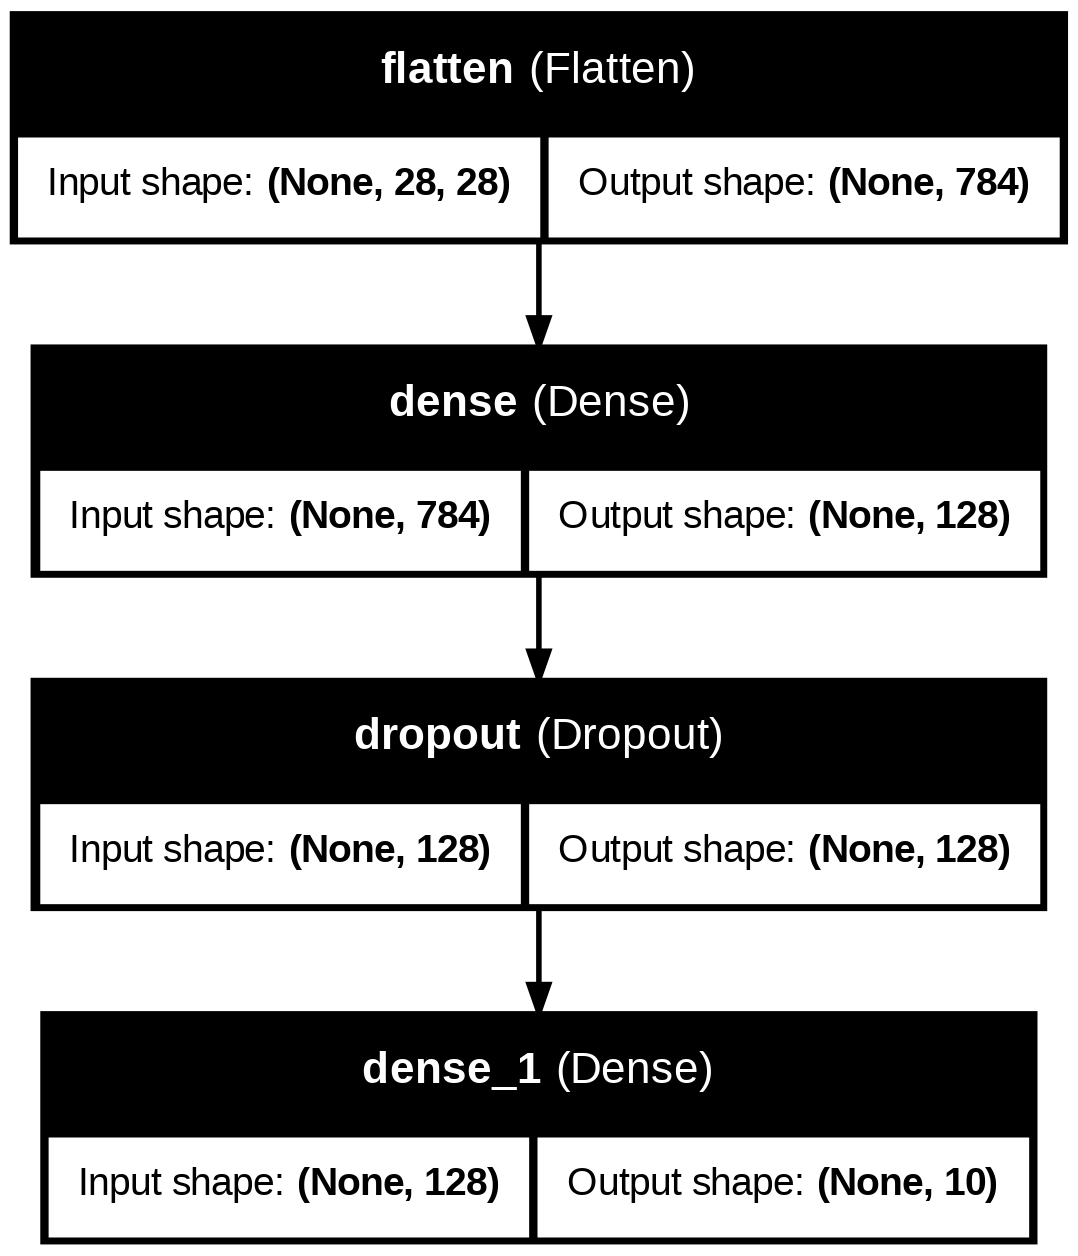

In [19]:
model.fit(x_train, y_train, epochs=5) # Modeli Eğitilmesi Adımı epocchs eğitim adım sayısı kaç kez eğitilceni gösteren parametre

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='YZ_Model/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı


In [20]:

# Test seti üzerinde modelin performansını değerlendirme

hata_oranı, basarı_oranı = model.evaluate(x_test, y_test, verbose=2)

print(" Modelin Doğruluk Oranı: %", basarı_oranı*100)
print(" Modelin Hata Oranı: %", hata_oranı*100)

313/313 - 1s - 4ms/step - accuracy: 0.9798 - loss: 0.0736
 Modelin Doğruluk Oranı: % 97.97999858856201
 Modelin Hata Oranı: % 7.359759509563446


Epoch 1, Loss: 0.7546864834739201, Accuracy: 81.07166666666667%
Epoch 2, Loss: 0.3667908896134098, Accuracy: 89.56333333333333%
Epoch 3, Loss: 0.32086409925461323, Accuracy: 90.72166666666666%
Epoch 4, Loss: 0.29410584540223517, Accuracy: 91.56833333333333%
Epoch 5, Loss: 0.2726430482646105, Accuracy: 92.13166666666666%
Epoch 6, Loss: 0.25366490924440976, Accuracy: 92.70833333333333%
Epoch 7, Loss: 0.23619152927624265, Accuracy: 93.255%
Epoch 8, Loss: 0.2207528935598412, Accuracy: 93.75166666666667%
Epoch 9, Loss: 0.20691200064570664, Accuracy: 94.14166666666667%
Epoch 10, Loss: 0.19410313432341192, Accuracy: 94.515%
Epoch 11, Loss: 0.18273635394474083, Accuracy: 94.90666666666667%
Epoch 12, Loss: 0.17257615778523722, Accuracy: 95.03333333333333%
Epoch 13, Loss: 0.1635063085069598, Accuracy: 95.34%
Epoch 14, Loss: 0.155343408265443, Accuracy: 95.525%
Epoch 15, Loss: 0.14781037134640634, Accuracy: 95.81%
Epoch 16, Loss: 0.14119293963683566, Accuracy: 95.94833333333334%
Epoch 17, Loss: 0

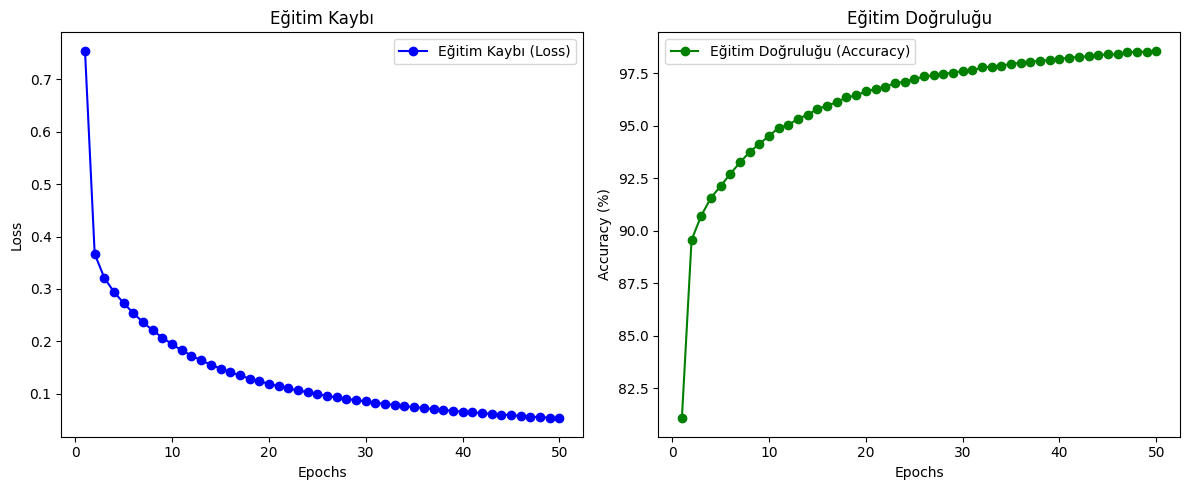

In [21]:
import torch #FACE UZERİNE CIKARILMIS GPU KULLANIR
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# MNIST veri setini yükleme
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Modeli oluşturma
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)#KATMANlarımız
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Kayıp fonksiyonu ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Eğitim için boş listeler tanımla
train_losses = []
train_accuracies = []

# Eğitme döngüsü
for epoch in range(50):  # 50 epoch boyunca eğit
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Kayıp (loss) değerini topla
        running_loss += loss.item()

        # Doğruluğu hesapla
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Her epoch sonunda ortalama kayıp ve doğruluk
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%')

print('Eğitim tamamlandı!')

# Eğitim sonuçlarını grafikle göster
epochs = range(1, 51)  # 50 epoch olduğu için 1'den 51'ya kadar olan epoch'lar
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'bo-', label='Eğitim Kaybı (Loss)')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'go-', label='Eğitim Doğruluğu (Accuracy)')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:

# Test verisi üzerinde modelin performansını değerlendirme
test_loss = 0.0
correct = 0
total = 0

# Test verisi üzerinde modelin kaybını ve doğruluğunu hesapla (gradyan hesaplama yok)
with torch.no_grad():
    for images, labels in test_loader:
        output = model(images)
        loss = criterion(output, labels)
        test_loss += loss.item()

        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Test seti kaybı ve doğruluğu
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print("Test Seti Kaybı: ", test_loss)
print("Test Seti Doğruluğu: ", test_accuracy , "%")

Test Seti Kaybı:  0.07976763873586466
Test Seti Doğruluğu:  97.66 %


In [23]:
!pip install keras

In [24]:
#KERAS KULLANIMI ÖRNEĞİ AMA HATA VAR CALISMÖIP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modeli oluşturma
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitme
model.fit(x_train, y_train, epochs=5)
